In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [10]:
df = pd.read_csv("publication_strategies.csv")

# Descriptive Analysis

In [11]:
df.head()

,clave,affiliations,intl_afil,authors,docs,book,chapter,conference,journal,q1q2,cites_3y,q3q4
0,1-2007,10,0,22,1,0,0,0,4,4,2,0
1,1-2008,11,2,23,2,0,0,0,5,2,2,3
2,1-2009,6,1,14,1,0,0,0,2,1,2,1
3,1-2010,32,18,59,6,0,0,0,8,6,6,2
4,1-2011,3,0,5,0,0,0,0,1,1,0,0


In [12]:
X = df.iloc[:,1:11].values
y = df.iloc[:,0].values

# Principal Component Analysis (PCA)

## Standardize the data

In [13]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

In [14]:
print('NumPy covariance matrix: \n%s' %np.cov(X_std.T))

NumPy covariance matrix: 
[[1.00004031 0.82897781 0.89973738 0.56147021 0.125033   0.28279588
  0.44192185 0.58575867 0.55336299 0.51638837]
 [0.82897781 1.00004031 0.95213125 0.18615166 0.03896652 0.05596042
  0.13171341 0.18679476 0.18992076 0.20199973]
 [0.89973738 0.95213125 1.00004031 0.30399181 0.05829165 0.14240892
  0.22667524 0.32373986 0.30161553 0.29518302]
 [0.56147021 0.18615166 0.30399181 1.00004031 0.12766933 0.3874816
  0.47209375 0.73178008 0.74675347 0.87814419]
 [0.125033   0.03896652 0.05829165 0.12766933 1.00004031 0.06609198
  0.07976935 0.11590758 0.11286286 0.11347028]
 [0.28279588 0.05596042 0.14240892 0.3874816  0.06609198 1.00004031
  0.28107796 0.14728389 0.27585699 0.33702288]
 [0.44192185 0.13171341 0.22667524 0.47209375 0.07976935 0.28107796
  1.00004031 0.23123366 0.25846412 0.4282699 ]
 [0.58575867 0.18679476 0.32373986 0.73178008 0.11590758 0.14728389
  0.23123366 1.00004031 0.88220402 0.62584897]
 [0.55336299 0.18992076 0.30161553 0.74675347 0.1128628

In [15]:
cov_mat = np.cov(X_std.T)

eig_vals, eig_vecs = np.linalg.eig(cov_mat)

print('Eigenvectors \n%s' %eig_vecs)
print('\nEigenvalues \n%s' %eig_vals)

Eigenvectors 
[[-4.11831574e-01 -3.05693886e-01  2.99748530e-02  4.23263417e-03
   1.94208101e-02 -1.43216901e-01  7.34775674e-01 -3.48793714e-01
   2.05216414e-01  1.07122471e-01]
 [-2.67068055e-01 -5.78950387e-01 -2.38470683e-02  2.99221613e-03
  -5.00889264e-02  1.36136049e-01 -5.23470105e-01 -4.94053569e-01
  -2.13815689e-01 -8.96912161e-02]
 [-3.19416266e-01 -5.13847261e-01 -4.08489233e-03 -5.61804001e-03
  -5.03511551e-02  2.91675305e-02 -2.13297413e-02  7.91861812e-01
   5.14468784e-02 -1.87920379e-02]
 [-3.93506279e-01  2.92877846e-01  4.70125940e-03 -5.14236635e-02
   5.35883391e-02  3.33941152e-01  2.27204244e-02 -7.92131163e-03
   1.86764373e-01 -7.79012569e-01]
 [-7.87211173e-02  5.49376648e-02  1.24219073e-01  9.87067508e-01
  -1.08171100e-02  1.64233608e-02 -1.97892875e-02  1.05053117e-02
  -1.27065146e-02 -1.42303033e-03]
 [-1.86356915e-01  1.60292413e-01  6.24712675e-01 -1.08779424e-01
  -7.04458896e-01 -1.44053968e-01 -1.06746865e-01 -1.37077526e-02
   6.54122398e-02  

In [16]:
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
eig_pairs.sort(key=lambda x: x[0], reverse=True)

print('Autovalores en orden descendiente:')
for i in eig_pairs:
    print(i[0])

Autovalores en orden descendiente:
4.655209090366712
1.9000824605313256
1.0464731086776877
0.9741102999553051
0.724530474533842
0.4251336283293058
0.11924382333178106
0.09878252000597373
0.03314042525968861
0.023697281033212687


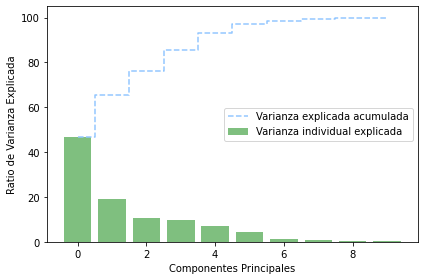

In [17]:
tot = sum(eig_vals)
var_exp = [(i / tot) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

with plt.style.context('seaborn-pastel'):
    plt.figure(figsize=(6, 4))
    plt.tight_layout()
    plt.bar(range(10), var_exp, alpha=0.5, align='center',
            label='Varianza individual explicada', color='g')
    plt.step(range(10), cum_var_exp, where='mid', linestyle='--', label='Varianza explicada acumulada')
    plt.ylabel('Ratio de Varianza Explicada')
    plt.xlabel('Componentes Principales')
    plt.legend(loc='best')
    plt.tight_layout()

In [18]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(10,1),
                      eig_pairs[1][1].reshape(10,1)))

print('Matriz W:\n', matrix_w)

Y = X_std.dot(matrix_w)

Matriz W:
 [[-0.41183157 -0.30569389]
 [-0.26706806 -0.57895039]
 [-0.31941627 -0.51384726]
 [-0.39350628  0.29287785]
 [-0.07872112  0.05493766]
 [-0.18635691  0.16029241]
 [-0.23838497  0.09940491]
 [-0.36397726  0.22356684]
 [-0.36919048  0.25278799]
 [-0.36832201  0.26281974]]


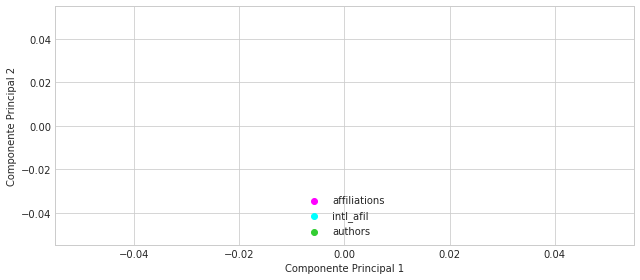

In [19]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 4))
    for lab, col in zip(('affiliations', 'intl_afil', 'authors'),
                        ('magenta', 'cyan', 'limegreen')):
        plt.scatter(Y[y==lab, 0],
                    Y[y==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Componente Principal 1')
    plt.ylabel('Componente Principal 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()

In [22]:
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, adjusted_rand_score, mutual_info_score, adjusted_mutual_info_score, normalized_mutual_info_score

# Clustering

# K means

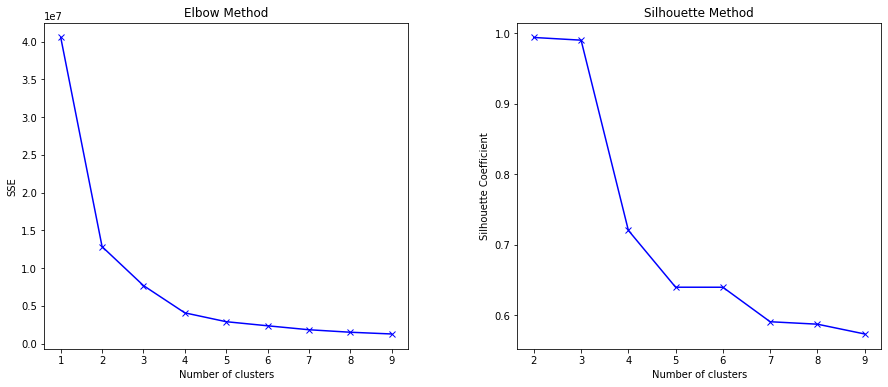

In [23]:
sse = []
silhouette_coeff = []
K = range(1,10) 

for k in K:  
    k_means = KMeans(n_clusters=k)
    cluster_labels = k_means.fit_predict(X)     
    
    sse.append(k_means.inertia_)
    if k > 1:
        silhouette_coeff.append(silhouette_score(X, cluster_labels))
    
fig, ax = plt.subplots(1, 2, figsize=(15,6))

ax[0].plot(K, sse, 'bx-') 
ax[0].set_xlabel('Number of clusters') 
ax[0].set_ylabel('SSE') 
ax[0].set_title('Elbow Method') 

ax[1].plot(K[1:], silhouette_coeff, 'bx-')
ax[1].set_xlabel('Number of clusters') 
ax[1].set_ylabel('Silhouette Coefficient') 
ax[1].set_title('Silhouette Method')
plt.subplots_adjust(wspace=0.3)
plt.show() 

In [24]:
k_means = KMeans(n_clusters=3)
y_pred = k_means.fit_predict(X) 

In [25]:
ari = adjusted_rand_score(y, y_pred)
mi = mutual_info_score(y, y_pred)
nmi = adjusted_mutual_info_score(y, y_pred)
ami = normalized_mutual_info_score(y, y_pred)
print("Adjusted Rand Index: ", ari)
print("Mutual Information: ", mi)
print("Normalized Mutual Information (NMI): ", nmi)
print("Adjusted Mutual Information (AMI): ", ami)

Adjusted Rand Index:  0.0
Mutual Information:  0.002409760211551668
Normalized Mutual Information (NMI):  -2.3473997487740776e-14
Adjusted Mutual Information (AMI):  0.00047617455825450686


In [26]:
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(X[:, 2], X[:, 3], c=y, cmap='brg',
edgecolor='k', s=150)
axes[1].scatter(X[:, 2], X[:, 3], c=y_pred, cmap='jet',
edgecolor='k', s=150)
axes[0].set_xlabel('Petal length', fontsize=18)
axes[0].set_ylabel('Petal width', fontsize=18)
axes[1].set_xlabel('Petal length', fontsize=18)
axes[1].set_ylabel('Petal width', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)

ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not ['1-2007' '1-2008' '1-2009' ... '3349-2012' '3349-2013' '3349-2014']

# DBSCAN Model

In [ ]:
dbscan = DBSCAN(0.42)
y_pred2 = dbscan.fit_predict(X)

In [ ]:
n_noise = list(y_pred2).count(-1)
n_clusters = np.sum(np.unique(y_pred2)>-1)
ari = adjusted_rand_score(y, y_pred2)
mi = mutual_info_score(y, y_pred2)
nmi = adjusted_mutual_info_score(y, y_pred2)
ami = normalized_mutual_info_score(y, y_pred2)
print("Estimated number of clusters: ", n_clusters)
print("Estimated number of noise points: ", n_noise)
print("Adjusted Rand Index: ", ari) # Best score is 1.0
print("Mutual Information: ", mi)
print("Normalized Mutual Information (NMI): ", nmi) # Best score is 1.0
print("Adjusted Mutual Information (AMI): ", ami) # Best score is 1.0

In [ ]:
core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True

unique_labels = set(y_pred2)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]

    class_member_mask = (dbscan.labels_ == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters)
plt.show()

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(X[:, 2], X[:, 3], c=y, cmap='brg',
edgecolor='k', s=150)
axes[1].scatter(X[:, 2], X[:, 3], c=y_pred2, cmap='jet',
edgecolor='k', s=150)
axes[0].set_xlabel('Petal length', fontsize=18)
axes[0].set_ylabel('Petal width', fontsize=18)
axes[1].set_xlabel('Petal length', fontsize=18)
axes[1].set_ylabel('Petal width', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)

# Cluster description

# Extra points
